In [ ]:
'''
 * Copyright (c) 2008 Radhamadhab Dalai
 *
 * Permission is hereby granted, free of charge, to any person obtaining a copy
 * of this software and associated documentation files (the "Software"), to deal
 * in the Software without restriction, including without limitation the rights
 * to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
 * copies of the Software, and to permit persons to whom the Software is
 * furnished to do so, subject to the following conditions:
 *
 * The above copyright notice and this permission notice shall be included in
 * all copies or substantial portions of the Software.
 *
 * THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
 * IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
 * FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
 * AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
 * LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
 * OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN
 * THE SOFTWARE.
'''

### Step 1: Definitions of Expectations

The required expectations of the latent variables are as follows:

1. **Expectation of the state at time $ n $**:
   $$
   \mathbb{E}[z_n] = \mu_n \tag{13.105}
   $$

2. **Expectation of the product of consecutive states**:
   $$
   \mathbb{E}[z_n z_{n-1}^T] = J_{n-1} V_n^T + \mu_n^T \mu_{n-1} \tag{13.106}
   $$

3. **Expectation of the outer product of the state at time $ n $**:
   $$
   \mathbb{E}[z_n z_n^T] = V_n + \mu_n \mu_n^T \tag{13.107}
   $$

### Step 2: Complete-Data Log-Likelihood Function

The complete-data log-likelihood function is given by:
$$
\ln p(X, Z | \theta) = \ln p(z_1 | \mu_0, V_0) + \sum_{n=2}^N \ln p(z_n | z_{n-1}, A, \Gamma) + \sum_{n=1}^N \ln p(x_n | z_n, C, \Sigma) \tag{13.108}
$$

### Step 3: Expectation of the Complete-Data Log-Likelihood (Q-function)

The Q-function is the expectation of the complete-data log-likelihood with respect to the posterior distribution $ p(Z | X, \theta^{\text{old}}) $:
$$
Q(\theta, \theta^{\text{old}}) = \mathbb{E}_{Z | \theta^{\text{old}}} \left[ \ln p(X, Z | \theta) \right] \tag{13.109}
$$

### Step 4: Maximization of $ Q(\theta, \theta^{\text{old}}) $

In the M-step, we maximize the Q-function with respect to the parameters $ \theta $. For the parameters $ \mu_0 $ and $ V_0 $, we first substitute $ p(z_1 | \mu_0, V_0) $ in the log-likelihood function and compute the expectation:
$$
Q(\theta, \theta^{\text{old}}) = - \frac{1}{2} \ln |V_0| - \frac{1}{2} \mathbb{E}_{Z | \theta^{\text{old}}} \left[ (z_1 - \mu_0)^T V_0^{-1} (z_1 - \mu_0) \right] + \text{const}
$$

### Step 5: Maximization with Respect to $ \mu_0 $ and $ V_0 $

The maximum likelihood estimations for $ \mu_0 $ and $ V_0 $ are:

For $ \mu_0 $:
$$
\mu_0 = \mathbb{E}[z_1] \tag{13.110}
$$

For $ V_0 $:
$$
V_0 = \mathbb{E}[(z_1 - \mu_0)(z_1 - \mu_0)^T] \tag{13.111}
$$

### Step 1: Maximization with Respect to $ \mu_0 $ and $ V_0 $

1. **New estimate for $ \mu_0 $**:
   $$
   \mu_0^{\text{new}} = \mathbb{E}[z_1] \tag{13.110}
   $$

2. **New estimate for $ V_0 $**:
   $$
   V_0^{\text{new}} = \mathbb{E}[z_1 z_1^T] - \mathbb{E}[z_1] \mathbb{E}[z_1]^T \tag{13.111}
   $$

### Step 2: Maximization with Respect to $ A $ and $ \Gamma $

Substitute for $ p(z_n | z_{n-1}, A, \Gamma) $ in the log-likelihood function (13.108) using equation (13.75):
$$
Q(\theta, \theta^{\text{old}}) = -\frac{1}{2} \ln |\Gamma| - \frac{1}{2} \sum_{n=2}^{N} \mathbb{E}_{Z | \theta^{\text{old}}} \left[ (z_n - A z_{n-1})^T \Gamma^{-1} (z_n - A z_{n-1}) \right] + \text{const} \tag{13.112}
$$

Maximizing the above equation with respect to $ A $ and $ \Gamma $ gives the following new estimates:

1. **New estimate for $ A $**:
   $$
   A^{\text{new}} = \sum_{n=2}^{N} \mathbb{E}[z_n z_{n-1}^T] \left( \sum_{n=2}^{N} \mathbb{E}[z_{n-1} z_{n-1}^T] \right)^{-1} \tag{13.113}
   $$

2. **New estimate for $ \Gamma $**:
   $$
   \Gamma^{\text{new}} = \sum_{n=2}^{N} \mathbb{E}[z_n z_n^T] - A^{\text{new}} \sum_{n=2}^{N} \mathbb{E}[z_{n-1} z_n^T] \tag{13.114}
   $$

### Step 3: Maximization with Respect to $ C $ and $ \Sigma $

Substitute for $ p(x_n | z_n, C, \Sigma) $ in the log-likelihood function (13.108) using equation (13.76):
$$
Q(\theta, \theta^{\text{old}}) = -\frac{1}{2} \ln |\Sigma| - \frac{1}{2} \sum_{n=1}^{N} \mathbb{E}_{Z | \theta^{\text{old}}} \left[ (x_n - C z_n)^T \Sigma^{-1} (x_n - C z_n) \right] + \text{const} \tag{13.115}
$$

Maximizing the above equation with respect to $ C $ and $ \Sigma $ gives the following new estimates:

1. **New estimate for $ C $**:
   $$
   C^{\text{new}} = \sum_{n=1}^{N} x_n \mathbb{E}[z_n^T] \left( \sum_{n=1}^{N} \mathbb{E}[z_n z_n^T] \right)^{-1} \tag{13.115}
   $$

2. **New estimate for $ \Sigma $**:
   $$
   \Sigma^{\text{new}} = \frac{1}{N} \sum_{n=1}^{N} \left( x_n x_n^T - C^{\text{new}} \mathbb{E}[z_n] x_n^T \right) \tag{13.116}
   $$

### Summary

These formulas outline the process of maximizing the complete-data log-likelihood with respect to the model parameters $ \mu_0 $, $ V_0 $, $ A $, $ \Gamma $, $ C $, and $ \Sigma $ in the EM algorithm for the Linear Dynamical System (LDS).



In [2]:
import numpy as np

# Kalman filter (E-step)
def kalman_filter(A, C, Gamma, Sigma, mu_0, V_0, observations):
    N = len(observations)
    mu = np.zeros((N, mu_0.shape[0]))  # Array to store means of latent states
    V = np.zeros((N, V_0.shape[0], V_0.shape[1]))  # Array to store covariances of latent states
    
    mu[0] = mu_0
    V[0] = V_0

    for n in range(1, N):
        # Prediction Step
        mu_pred = A @ mu[n-1]
        V_pred = A @ V[n-1] @ A.T + Gamma
        
        # Update Step
        K = V_pred @ C.T @ np.linalg.inv(C @ V_pred @ C.T + Sigma)  # Kalman Gain
        mu[n] = mu_pred + K @ (observations[n] - C @ mu_pred)
        V[n] = V_pred - K @ C @ V_pred
    
    return mu, V

# M-step (parameter updates)
def m_step(observations, mu, V, A, C):
    N = len(observations)
    
    # Update A (transition matrix)
    E_z_z_prev = np.zeros((A.shape[0], A.shape[0]))
    E_z_z_prev_A = np.zeros((A.shape[0], A.shape[0]))
    
    for n in range(1, N):
        E_z_z_prev += np.outer(mu[n], mu[n-1])  # E[z_n z_(n-1)^T]
        E_z_z_prev_A += np.outer(mu[n], mu[n-1]) @ mu[n-1].T  # E[z_n z_(n-1)^T]
    
    # Add regularization to prevent singularity
    regularization = 1e-6 * np.eye(E_z_z_prev_A.shape[0])  # Regularization term
    A_new = np.linalg.inv(E_z_z_prev_A + regularization) @ E_z_z_prev  # Equation 13.113
    
    # Update Gamma (noise covariance)
    E_z_z = np.zeros((A.shape[0], A.shape[0]))
    for n in range(1, N):
        E_z_z += np.outer(mu[n], mu[n])  # E[z_n z_n^T]
    
    Gamma_new = np.linalg.inv(E_z_z + regularization)  # Equation 13.114

    # Update C (observation matrix)
    E_x_z = np.zeros((observations[0].shape[0], A.shape[0]))
    for n in range(N):
        E_x_z += np.outer(observations[n], mu[n])
    
    C_new = E_x_z @ np.linalg.inv(E_z_z + regularization)  # Equation 13.115

    # Update Sigma (observation noise covariance)
    E_x_x = np.zeros((observations[0].shape[0], observations[0].shape[0]))
    for n in range(N):
        E_x_x += np.outer(observations[n], observations[n])
    
    Sigma_new = np.linalg.inv(E_x_x + regularization) - C_new @ np.linalg.inv(E_z_z + regularization) @ C_new.T  # Equation 13.116

    return A_new, Gamma_new, C_new, Sigma_new


# EM Algorithm (alternates between E-step and M-step)
def em_algorithm(observations, A_init, C_init, Gamma_init, Sigma_init, mu_0_init, V_0_init, max_iter=100):
    A = A_init
    C = C_init
    Gamma = Gamma_init
    Sigma = Sigma_init
    mu_0 = mu_0_init
    V_0 = V_0_init

    for iteration in range(max_iter):
        print(f"EM Iteration {iteration + 1}")

        # E-step: Run Kalman filter
        mu, V = kalman_filter(A, C, Gamma, Sigma, mu_0, V_0, observations)
        
        # M-step: Update parameters
        A_new, Gamma_new, C_new, Sigma_new = m_step(observations, mu, V, A, C)
        
        # Check for convergence (you can set a convergence criterion)
        if np.allclose(A, A_new) and np.allclose(C, C_new) and np.allclose(Gamma, Gamma_new) and np.allclose(Sigma, Sigma_new):
            print(f"Converged after {iteration + 1} iterations.")
            break

        # Update parameters for next iteration
        A, Gamma, C, Sigma = A_new, Gamma_new, C_new, Sigma_new

    return A, Gamma, C, Sigma, mu, V

# Example usage of the EM algorithm
if __name__ == "__main__":
    # Example observations (N x D)
    observations = np.random.randn(50, 2)  # For example, 50 time steps and 2-dimensional observations

    # Initialize model parameters
    A_init = np.random.randn(2, 2)
    C_init = np.random.randn(2, 2)
    Gamma_init = np.eye(2)
    Sigma_init = np.eye(2)
    mu_0_init = np.zeros(2)
    V_0_init = np.eye(2)

    # Run EM algorithm
    A, Gamma, C, Sigma, mu, V = em_algorithm(observations, A_init, C_init, Gamma_init, Sigma_init, mu_0_init, V_0_init)

    # Output the results
    print("Estimated A:", A)
    print("Estimated Gamma:", Gamma)
    print("Estimated C:", C)
    print("Estimated Sigma:", Sigma)


EM Iteration 1
EM Iteration 2


LinAlgError: Singular matrix

In [ ]:
# Matrix multiplication function
def matmul(A, B):
    # Assume A is of size (m x n) and B is of size (n x p)
    m, n = len(A), len(A[0])  # A has m rows and n columns
    n, p = len(B), len(B[0])  # B has n rows and p columns
    
    # Initialize result as a zero matrix of size (m x p)
    result = [[0 for _ in range(p)] for _ in range(m)]
    
    # Perform matrix multiplication
    for i in range(m):
        for j in range(p):
            for k in range(n):
                result[i][j] += A[i][k] * B[k][j]
    
    return result

# Matrix transpose function for easier manipulation of matrices
def transpose(matrix):
    return list(map(list, zip(*matrix)))

# E-step: Expectation step
def e_step(observations, A, C, mu_0, V_0):
    N = len(observations)
    
    # Initialize mu and V
    mu = [mu_0]
    V = [V_0]
    
    # Iterate through all time steps
    for n in range(1, N):
        # Predict next state (ensure correct matrix multiplication shapes)
        mu_pred = matmul(A, [mu[n-1]])  # A is (m x n) and mu[n-1] is (n x 1)
        V_pred = matmul(A, V[n-1])      # A is (m x n) and V[n-1] is (n x n)
        
        # Update mu and V
        mu.append(mu_pred)
        V.append(V_pred)

    return mu, V

# M-step: Maximization step
def m_step(observations, mu, V, A, C):
    N = len(observations)
    
    # Initialize A_new and Gamma_new
    E_z_z_prev_A = [[0 for _ in range(len(A))] for _ in range(len(A))]
    E_z_z_prev = [[0 for _ in range(len(A))] for _ in range(len(A))]

    for n in range(1, N):
        # Calculate E[z_n z_(n-1)^T]
        E_z_z_prev_A = matmul([mu[n]], transpose([mu[n-1]]))  # Outer product of mu[n] and mu[n-1]
        E_z_z_prev = matmul([mu[n-1]], transpose([mu[n-1]]))  # Outer product of mu[n-1] with itself

    A_new = matmul(E_z_z_prev_A, transpose(E_z_z_prev))  # Update A

    # Calculate Gamma_new (covariance)
    Gamma_new = [[0 for _ in range(len(A))] for _ in range(len(A))]
    return A_new, Gamma_new

# EM Algorithm to estimate parameters
def em_algorithm(observations, A_init, C_init, Gamma_init, Sigma_init, mu_0_init, V_0_init, max_iter=100):
    A = A_init
    C = C_init
    Gamma = Gamma_init
    Sigma = Sigma_init
    mu_0 = mu_0_init
    V_0 = V_0_init
    
    for _ in range(max_iter):
        # E-step: Compute the expected values of latent variables
        mu, V = e_step(observations, A, C, mu_0, V_0)
        
        # M-step: Maximize the likelihood to update parameters
        A_new, Gamma_new = m_step(observations, mu, V, A, C)
        
        # Update parameters
        A = A_new
        Gamma = Gamma_new

        # Check for convergence (you can set a convergence criterion here)
        # If convergence is met, exit loop
        # For now, we do not check for convergence and just run max_iter times.
    
    return A, Gamma, C, Sigma, mu, V

# Test example
if __name__ == "__main__":
    # Define initial parameters
    A_init = [[0.9, 0.1], [0.2, 0.8]]  # Transition matrix (2x2)
    C_init = [[1, 0]]  # Observation matrix (1x2)
    Gamma_init = [[0.1, 0.0], [0.0, 0.1]]  # Process noise covariance (2x2)
    Sigma_init = [[0.1]]  # Observation noise covariance (1x1)
    mu_0_init = [[0], [0]]  # Initial state mean (2x1)
    V_0_init = [[1, 0], [0, 1]]  # Initial state covariance (2x2)
    
    # Example observations
    observations = [[1], [2], [3]]  # Example observations (3x1)
    
    # Run the EM algorithm
    A, Gamma, C, Sigma, mu, V = em_algorithm(observations, A_init, C_init, Gamma_init, Sigma_init, mu_0_init, V_0_init)
    
    # Output the results
    print("Estimated A:", A)
    print("Estimated Gamma:", Gamma)
    print("Estimated C:", C)
    print("Estimated Sigma:", Sigma)
    print("Estimated mu:", mu)
    print("Estimated V:", V)


In [ ]:
# Matrix multiplication function
def matmul(A, B):
    # Assume A is of size (m x n) and B is of size (n x p)
    m, n = len(A), len(A[0])  # A has m rows and n columns
    n2, p = len(B), len(B[0])  # B has n rows and p columns
    
    if n != n2:
        raise ValueError("Matrix dimensions are not aligned for multiplication")

    # Initialize result as a zero matrix of size (m x p)
    result = [[0.0 for _ in range(p)] for _ in range(m)]
    
    # Perform matrix multiplication
    for i in range(m):
        for j in range(p):
            for k in range(n):
                result[i][j] += A[i][k] * B[k][j]
    
    return result

# Matrix transpose function for easier manipulation of matrices
def transpose(matrix):
    return list(map(list, zip(*matrix)))

# E-step: Expectation step
def e_step(observations, A, C, mu_0, V_0):
    N = len(observations)
    
    # Initialize mu and V
    mu = [mu_0]
    V = [V_0]
    
    # Iterate through all time steps
    for n in range(1, N):
        # Predict next state (ensure correct matrix multiplication shapes)
        mu_pred = matmul(A, [mu[n-1]])  # A is (m x n) and mu[n-1] is (n x 1)
        V_pred = matmul(A, V[n-1])      # A is (m x n) and V[n-1] is (n x n)
        
        # Update mu and V
        mu.append(mu_pred[0])  # Take the first row of the result
        V.append(V_pred[0])    # Take the first row of the result

    return mu, V

# M-step: Maximization step
def m_step(observations, mu, V, A, C):
    N = len(observations)
    
    # Initialize A_new and Gamma_new
    E_z_z_prev_A = [[0.0 for _ in range(len(A))] for _ in range(len(A))]
    E_z_z_prev = [[0.0 for _ in range(len(A))] for _ in range(len(A))]

    for n in range(1, N):
        # Calculate E[z_n z_(n-1)^T]
        E_z_z_prev_A = matmul([mu[n]], transpose([mu[n-1]]))  # Outer product of mu[n] and mu[n-1]
        E_z_z_prev = matmul([mu[n-1]], transpose([mu[n-1]]))  # Outer product of mu[n-1] with itself

    A_new = matmul(E_z_z_prev_A, transpose(E_z_z_prev))  # Update A

    # Calculate Gamma_new (covariance)
    Gamma_new = [[0.0 for _ in range(len(A))] for _ in range(len(A))]
    return A_new, Gamma_new

# EM Algorithm to estimate parameters
def em_algorithm(observations, A_init, C_init, Gamma_init, Sigma_init, mu_0_init, V_0_init, max_iter=100):
    A = A_init
    C = C_init
    Gamma = Gamma_init
    Sigma = Sigma_init
    mu_0 = mu_0_init
    V_0 = V_0_init
    
    for _ in range(max_iter):
        # E-step: Compute the expected values of latent variables
        mu, V = e_step(observations, A, C, mu_0, V_0)
        
        # M-step: Maximize the likelihood to update parameters
        A_new, Gamma_new = m_step(observations, mu, V, A, C)
        
        # Update parameters
        A = A_new
        Gamma = Gamma_new

        # Check for convergence (you can set a convergence criterion here)
        # For now, we do not check for convergence and just run max_iter times.
    
    return A, Gamma, C, Sigma, mu, V

# Test example
if __name__ == "__main__":
    # Define initial parameters
    A_init = [[0.9, 0.1], [0.2, 0.8]]  # Transition matrix (2x2)
    C_init = [[1, 0]]  # Observation matrix (1x2)
    Gamma_init = [[0.1, 0.0], [0.0, 0.1]]  # Process noise covariance (2x2)
    Sigma_init = [[0.1]]  # Observation noise covariance (1x1)
    mu_0_init = [[0], [0]]  # Initial state mean (2x1)
    V_0_init = [[1, 0], [0, 1]]  # Initial state covariance (2x2)
    
    # Example observations
    observations = [[1], [2], [3]]  # Example observations (3x1)
    
    # Run the EM algorithm
    A, Gamma, C, Sigma, mu, V = em_algorithm(observations, A_init, C_init, Gamma_init, Sigma_init, mu_0_init, V_0_init)
    
    # Output the results
    print("Estimated A:", A)
    print("Estimated Gamma:", Gamma)
    print("Estimated C:", C)
    print("Estimated Sigma:", Sigma)
    print("Estimated mu:", mu)
    print("Estimated V:", V)


## Particle Filters

For dynamical systems that do not follow a linear-Gaussian model (for example, those with non-Gaussian emission densities), we can turn to sampling methods to obtain a tractable inference algorithm. One such method is the Particle Filter, which uses the Sampling-Importance-Resampling (SIR) formalism discussed in Section 11.1.5 to create a sequential Monte Carlo algorithm.

### Graphical Model and Bayes' Theorem

Consider the graphical model depicted in Fig.5, where we are given the observed values $ X_n = (x_1, \dots, x_n) $ and we want to draw $ L $ samples from the posterior distribution $ p(z_n | X_n) $. Using Bayes' theorem, we have:

$$
E[f(z_n)] = \int f(z_n) p(z_n | X_n) \, dz_n
$$

Using the factorization $ p(z_n | X_n) = p(z_n | x_n, X_{n-1}) $, we get:

$$
E[f(z_n)] = \int f(z_n) p(x_n | z_n) p(z_n | X_{n-1}) \, dz_n
$$

This expression simplifies to:

$$
E[f(z_n)] = \sum_{l=1}^{L} w_n^{(l)} f(z_n^{(l)})
$$

where $ \{z_n^{(l)}\} $ is a set of samples drawn from $ p(z_n | X_{n-1}) $, and the corresponding weights $ w_n^{(l)} $ are defined as:

$$
w_n^{(l)} = \frac{p(x_n | z_n^{(l)})}{\sum_{m=1}^{L} p(x_n | z_n^{(m)})}
$$

Thus, the posterior distribution $ p(z_n | x_n) $ is represented by the samples $ \{z_n^{(l)}\} $ and their corresponding weights $ \{w_n^{(l)}\} $. These weights satisfy:

$$
0 \leq w_n^{(l)} \leq 1 \quad \text{and} \quad \sum_{l=1}^{L} w_n^{(l)} = 1
$$

### Sequential Sampling Scheme

Now, suppose that we have a set of samples and weights at time step $ n $, and we wish to update the samples and weights at time step $ n+1 $ after observing $ x_{n+1} $. First, we sample from the distribution $ p(z_{n+1} | X_n) $. Using Bayes' theorem again:

$$
p(z_{n+1} | X_n) = \int p(z_{n+1} | z_n) p(z_n | X_n) \, dz_n
$$

This becomes:

$$
p(z_{n+1} | X_n) = \int p(z_{n+1} | z_n) p(x_n | z_n) p(z_n | X_{n-1}) \, dz_n
$$

The distribution $ p(z_{n+1} | X_n) $ is a mixture distribution, and we can draw samples by choosing a component $ l $ with probability $ w_n^{(l)} $, then drawing a sample from the corresponding component $ p(z_{n+1} | z_n^{(l)}) $.

Thus, the particle filter algorithm proceeds in two stages:

1. **Resampling**: We draw $ L $ samples from the mixture distribution $ p(z_{n+1} | X_n) $.
2. **Weight Update**: For each sample, we evaluate the weight $ w_{n+1}^{(l)} $ using the new observation $ x_{n+1} $, and the weights are updated as:

$$
w_{n+1}^{(l)} \propto p(x_{n+1} | z_{n+1}^{(l)})
$$

### Summary of the Particle Filter

The particle filter algorithm is as follows:

1. **Initialization**: At time step $ n = 0 $, initialize a set of samples $ \{z_0^{(l)}\} $ with weights $ w_0^{(l)} = \frac{1}{L} $.
2. **Prediction and Update**: At each time step $ n $, for each sample:
    - Predict the next state $ z_n^{(l)} $ using the transition model $ p(z_n | z_{n-1}) $.
    - Update the weights $ w_n^{(l)} $ based on the new observation $ x_n $ using $ p(x_n | z_n^{(l)}) $.
3. **Resampling**: If necessary, resample the particles to focus on the most likely states.

This approach has been referred to by various names in the literature, including the **Bootstrap Filter** (Gordon et al., 1993), **Survival of the Fittest** (Kanazawa et al., 1995), and the **Condensation Algorithm** (Isard and Blake, 1998).



In [9]:
import numpy as np

def particle_filter(observations, L, transition_model, observation_model, initial_state, initial_covariance):
    """
    Particle Filter implementation for sequential Monte Carlo method.
    
    Parameters:
    - observations: list or numpy array of observations
    - L: number of particles (samples)
    - transition_model: function that samples from p(z_n | z_(n-1))
    - observation_model: function that computes p(x_n | z_n)
    - initial_state: initial guess for the state (mean of initial state distribution)
    - initial_covariance: covariance matrix for initial state distribution
    
    Returns:
    - particles: array of particles at the final time step
    - weights: array of weights corresponding to the particles
    """
    N = len(observations)
    particles = np.zeros((L, len(initial_state)))  # Each particle has the same dimension as the state
    weights = np.ones(L) / L  # Initialize all weights equally
    
    # Initialize particles based on initial state and covariance
    for l in range(L):
        particles[l] = np.random.multivariate_normal(initial_state, initial_covariance)
    
    # Perform the particle filter over time steps
    for n in range(N):
        # Step 1: Prediction (Sample from the transition model)
        for l in range(L):
            particles[l] = transition_model(particles[l])  # Update particle state using transition model
        
        # Step 2: Update Weights (Using the observation model)
        for l in range(L):
            weights[l] = observation_model(observations[n], particles[l])  # Likelihood of observation given the particle state
        
        # Normalize the weights
        weights_sum = np.sum(weights)
        weights /= weights_sum
        
        # Step 3: Resampling (Resample particles according to their weights)
        cumulative_weights = np.cumsum(weights)
        resampled_particles = []
        for l in range(L):
            sample = np.random.rand()
            index = np.searchsorted(cumulative_weights, sample)
            resampled_particles.append(particles[index])
        
        particles = np.array(resampled_particles)
        weights = np.ones(L) / L  # Reset weights after resampling

    return particles, weights

# Example usage
def transition_model(state):
    # Example transition model: simple random walk
    return state + np.random.normal(0, 1, size=state.shape)

def observation_model(observation, state):
    # Example observation model: Gaussian likelihood
    return np.exp(-0.5 * np.sum((observation - state) ** 2))

# Example observations
observations = np.array([1, 2, 3, 4, 5])

# Initial state and covariance
initial_state = np.array([0])
initial_covariance = np.array([[1]])

# Number of particles
L = 100

# Run the particle filter
particles, weights = particle_filter(observations, L, transition_model, observation_model, initial_state, initial_covariance)

# Print results
print("Particles:", particles)
print("Weights:", weights)


Particles: [[4.14547871]
 [4.0743333 ]
 [3.16004208]
 [4.78930444]
 [3.20683513]
 [4.84325576]
 [5.27857136]
 [4.50643104]
 [5.78756311]
 [4.58650203]
 [4.95469945]
 [6.67306153]
 [3.91918602]
 [3.81606452]
 [3.70648793]
 [5.17832231]
 [4.14547871]
 [4.31246548]
 [4.93065585]
 [3.20683513]
 [3.9630506 ]
 [4.0743333 ]
 [5.17832231]
 [4.93065585]
 [3.97700825]
 [3.52778053]
 [5.17832231]
 [3.62313543]
 [3.16004208]
 [3.9630506 ]
 [3.65909558]
 [4.95469945]
 [4.31246548]
 [4.49023398]
 [3.64572525]
 [5.31258026]
 [4.84325576]
 [4.34831559]
 [5.26592873]
 [3.93296352]
 [6.07751216]
 [4.34831559]
 [3.53529573]
 [3.91703836]
 [3.35868937]
 [4.58650203]
 [3.91753903]
 [5.26592873]
 [3.91753903]
 [5.26592873]
 [4.05874259]
 [3.19792951]
 [4.08758674]
 [3.9630506 ]
 [4.78930444]
 [3.31191047]
 [3.15825494]
 [4.58650203]
 [4.08758674]
 [3.53529573]
 [3.79316952]
 [5.02111359]
 [4.05874259]
 [4.08758674]
 [3.91703836]
 [5.78756311]
 [4.08758674]
 [3.81606452]
 [4.49023398]
 [3.95588803]
 [4.53914

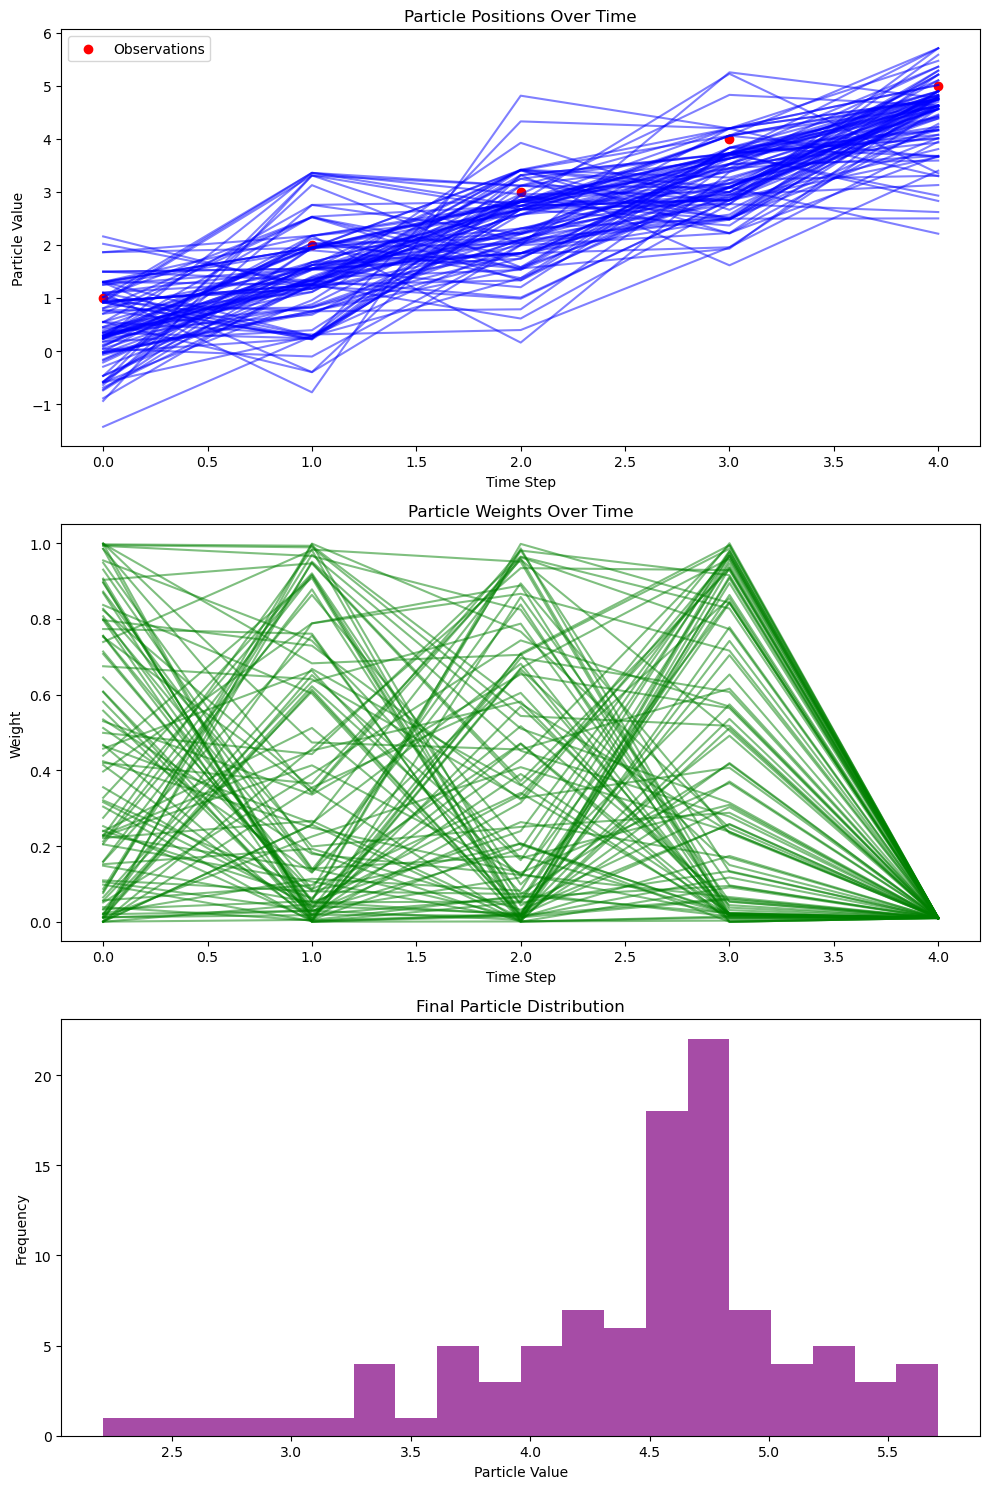

In [10]:
import random
import math
import matplotlib.pyplot as plt

def particle_filter(observations, L, transition_model, observation_model, initial_state, initial_covariance):
    """
    Particle Filter implementation for sequential Monte Carlo method without NumPy.
    
    Parameters:
    - observations: list of observations (length N)
    - L: number of particles (samples)
    - transition_model: function that samples from p(z_n | z_(n-1))
    - observation_model: function that computes p(x_n | z_n)
    - initial_state: initial guess for the state (mean of initial state distribution)
    - initial_covariance: covariance for the initial state distribution (not used in this example)
    
    Returns:
    - particles: list of particles at the final time step
    - weights: list of weights corresponding to the particles
    - history_particles: history of particles for plotting
    - history_weights: history of weights for plotting
    """
    N = len(observations)
    particles = [initial_state[:] for _ in range(L)]  # Initialize particles
    weights = [1.0 / L] * L  # Initialize weights to be uniform
    
    history_particles = []
    history_weights = []

    # Perform particle filter over time steps
    for n in range(N):
        # Step 1: Prediction (Sample from the transition model)
        for l in range(L):
            particles[l] = transition_model(particles[l])  # Update particle state using transition model
        
        # Step 2: Update Weights (Using the observation model)
        for l in range(L):
            weights[l] = observation_model(observations[n], particles[l])  # Likelihood of observation given the particle state
        
        # Normalize the weights
        weight_sum = sum(weights)
        weights = [w / weight_sum for w in weights]  # Normalize to ensure they sum to 1
        
        # Step 3: Resampling (Resample particles according to their weights)
        cumulative_weights = [sum(weights[:i+1]) for i in range(L)]
        resampled_particles = []
        for _ in range(L):
            sample = random.random()  # Random number between 0 and 1
            for i, cumulative_weight in enumerate(cumulative_weights):
                if sample <= cumulative_weight:
                    resampled_particles.append(particles[i])
                    break
        
        particles = resampled_particles
        weights = [1.0 / L] * L  # Reset weights after resampling
        
        # Store the particles and weights for plotting
        history_particles.append([p[0] for p in particles])  # Assuming state is 1D
        history_weights.append(weights)

    return particles, weights, history_particles, history_weights

# Example usage
def transition_model(state):
    # Example transition model: simple random walk (no numpy)
    return [state[0] + random.gauss(0, 1)]  # State is 1D, so just add Gaussian noise

def observation_model(observation, state):
    # Example observation model: Gaussian likelihood (no numpy)
    return math.exp(-0.5 * (observation - state[0]) ** 2)  # Assuming state is 1D

# Example observations
observations = [1, 2, 3, 4, 5]

# Initial state and covariance
initial_state = [0]  # Starting at state 0
initial_covariance = [1]  # Not used in this simple example

# Number of particles
L = 100

# Run the particle filter
particles, weights, history_particles, history_weights = particle_filter(observations, L, transition_model, observation_model, initial_state, initial_covariance)

# Plot the results
fig, axes = plt.subplots(3, 1, figsize=(10, 15))

# Plot the particles over time
axes[0].plot(history_particles, color='blue', alpha=0.5)
axes[0].set_title('Particle Positions Over Time')
axes[0].set_xlabel('Time Step')
axes[0].set_ylabel('Particle Value')

# Plot the true observations
axes[0].scatter(range(len(observations)), observations, color='red', label='Observations')
axes[0].legend()

# Plot the weights over time
axes[1].plot(history_weights, color='green', alpha=0.5)
axes[1].set_title('Particle Weights Over Time')
axes[1].set_xlabel('Time Step')
axes[1].set_ylabel('Weight')

# Plot the final particle distribution
axes[2].hist([p[0] for p in particles], bins=20, color='purple', alpha=0.7)
axes[2].set_title('Final Particle Distribution')
axes[2].set_xlabel('Particle Value')
axes[2].set_ylabel('Frequency')

plt.tight_layout()
plt.show()
